In [1]:
import numpy as np
import matplotlib.pyplot as plt
from wildcatter.environment import SimpleDriller
from sb3_contrib import MaskablePPO
from sb3_contrib.common.maskable.evaluation import evaluate_policy
from sb3_contrib.common.maskable.utils import get_action_masks

In [2]:
env_2d_stacked_config = dict(model_type = "not_random",
                  model_path=r"data/2d_stacked.csv",
                  delim=",",
                  available_pipe=30,
                  available_wells=2,
                  oil_price = 40,
                  relocation_cost = 0.2,
                  drilling_cost = 0.5,
                  drilling_depth_markup = 0.1,
                 )
env_2d_stacked = SimpleDriller(env_2d_stacked_config)

env_random_config = dict(model_type = "random",
                  nrow=11,
                  ncol=40,
                  available_pipe=30,
                  available_wells=2,
                  oil_price = 40,
                  relocation_cost = 0.2,
                  drilling_cost = 0.5,
                  drilling_depth_markup = 0.1,
                 )
env_random = SimpleDriller(env_random_config)

env_2d_two_rectangular_targets_config = dict(model_type = "not_random",
                  model_path=r"data/2d_two_rectangular_targets.csv",
                  delim=",",
                  available_pipe=30,
                  available_wells=2,
                  oil_price = 40,
                  relocation_cost = 0.2,
                  drilling_cost = 0.5,
                  drilling_depth_markup = 0.1,
                 )
env_2d_two_rectangular_targets = SimpleDriller(env_2d_two_rectangular_targets_config)

Beginning Drill Campaign
Action: 21 Reward: -0.0
Action: 0 Reward: -0.6
Action: 3 Reward: -0.6
Action: 0 Reward: -0.7
Action: 1 Reward: -0.7
Action: 42 Reward: 0
Action: 17 Reward: -0.0
Action: 42 Reward: 0
Action: 42 Reward: 0


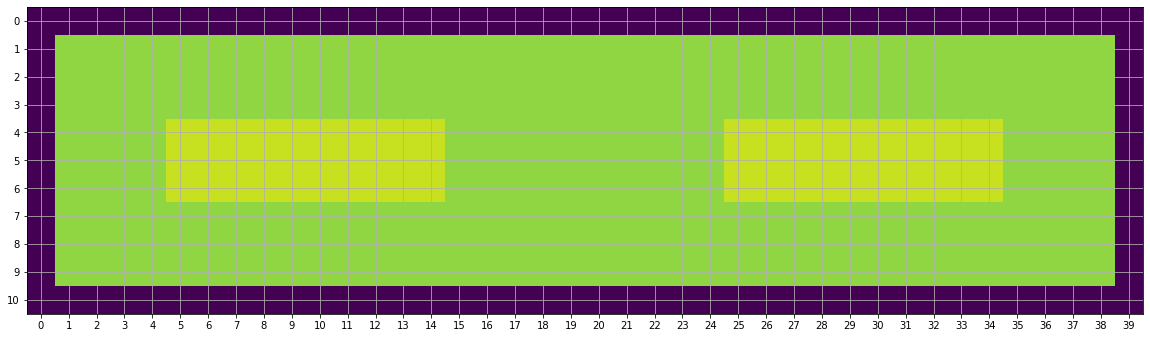

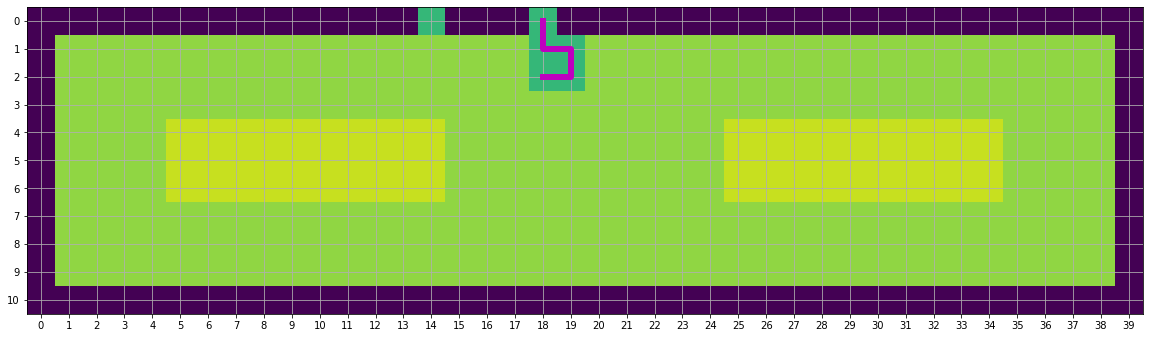

In [10]:
env = env_2d_two_rectangular_targets
print("Beginning Drill Campaign")
state = env.reset()
all_actions = np.arange(4 + env.ncol-2 + 1)
done = False
score = 0
plt.figure(figsize=(20, 20))
plt.imshow(env.state, vmin=-10, vmax=2)
plt.xticks(np.arange(0, env.ncol, 1.0))
plt.yticks(np.arange(0, env.nrow, 1.0))
plt.xlim([-0.5, env.ncol - 0.5])
plt.ylim([env.nrow - 0.5, -0.5])
plt.grid()

while not done:
    legal_actions = env.action_masks()
    action = env.action_space.sample()
    while not action in all_actions[legal_actions]:
        action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    print("Action:",action,"Reward:",reward)
    score += reward

plt.figure(figsize=(20, 20))
plt.imshow(env.state, vmin=-10, vmax=2)
for well in env.trajectory:
    traj_z, traj_x = np.asarray(well).T
    plt.plot(traj_x, traj_z, "-", c="m", linewidth=6)
plt.xticks(np.arange(0, env.ncol, 1.0))
plt.yticks(np.arange(0, env.nrow, 1.0))
plt.xlim([-0.5, env.ncol - 0.5])
plt.ylim([env.nrow - 0.5, -0.5])
plt.grid()

## PPO Agent Training

Here we will import Proximal Policy Optimization (PPO) algorithm from Stable Baselines3 and train it with minimal parameters.

We allow it to train for 50,000 time samples.

For more information about PPO, please refer to our hello world example notebook [here](https://github.com/GeoML-SIG/wildcatter/blob/main/examples/01_rl_hello_world_cartpole.ipynb).

In [25]:
env = env_2d_two_rectangular_targets
model = MaskablePPO("MlpPolicy", env, learning_rate=0.0027, n_steps=1024, batch_size=64, n_epochs=10, gamma=0.995, gae_lambda=0.90,
                    clip_range=0.2, ent_coef=0.0000001, vf_coef=0.5, max_grad_norm=0.5, verbose=1)
model.set_random_seed(0)
model.learn(total_timesteps=2 * 20_480, log_interval=5)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 12.2       |
|    ep_rew_mean          | 187        |
| time/                   |            |
|    fps                  | 574        |
|    iterations           | 5          |
|    time_elapsed         | 8          |
|    total_timesteps      | 5120       |
| train/                  |            |
|    approx_kl            | 0.01075933 |
|    clip_fraction        | 0.0954     |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.27      |
|    explained_variance   | 0          |
|    learning_rate        | 0.0027     |
|    loss                 | 3.65e+04   |
|    n_updates            | 40         |
|    policy_gradient_loss | -0.00605   |
|    value_loss           | 8.42e+04   |
----------------------------------------
----------------------------------------
| ro

In [15]:
env = env_2d_two_rectangular_targets
model = MaskablePPO("MlpPolicy", env, learning_rate=0.00081, n_steps=1024, batch_size=64, n_epochs=10, gamma=0.995, gae_lambda=0.95,
                    clip_range=0.2, ent_coef=0.00000001, vf_coef=0.5, max_grad_norm=0.5, verbose=1)
model.set_random_seed(0)
model.learn(total_timesteps=2 * 20_480, log_interval=2*5)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 17.2        |
|    ep_rew_mean          | 238         |
| time/                   |             |
|    fps                  | 583         |
|    iterations           | 10          |
|    time_elapsed         | 17          |
|    total_timesteps      | 10240       |
| train/                  |             |
|    approx_kl            | 0.006729874 |
|    clip_fraction        | 0.0374      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.29       |
|    explained_variance   | 1.79e-07    |
|    learning_rate        | 0.00081     |
|    loss                 | 7.54e+04    |
|    n_updates            | 90          |
|    policy_gradient_loss | -0.00641    |
|    value_loss           | 1.16e+05    |
-----------------------------------------
------------------------

Beginning Drill Campaign
Reward: 0


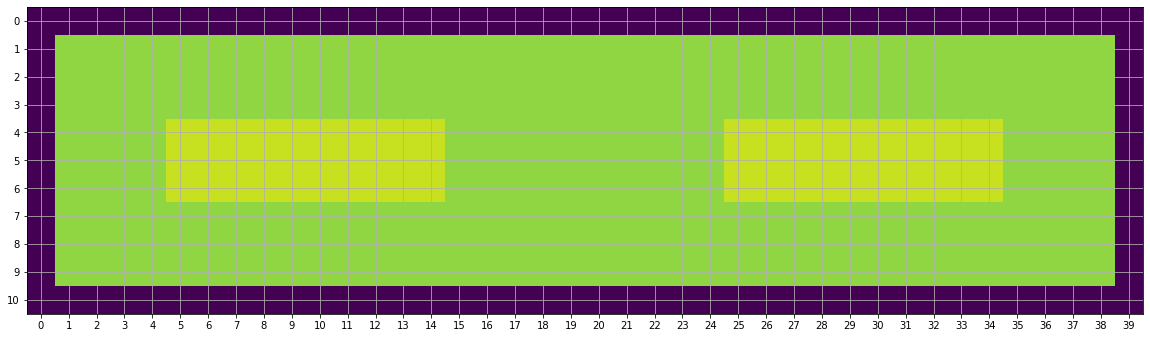

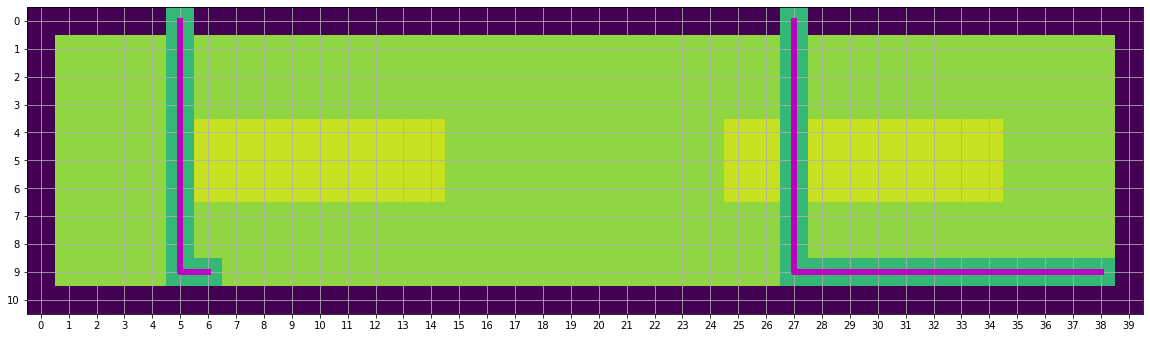

In [26]:
print("Beginning Drill Campaign")
obs = env.reset()
done = False
score = 0
plt.figure(figsize=(20, 20))
plt.imshow(env.state, vmin=-10, vmax=2)
plt.xticks(np.arange(0, env.ncol, 1.0))
plt.yticks(np.arange(0, env.nrow, 1.0))
plt.xlim([-0.5, env.ncol - 0.5])
plt.ylim([env.nrow - 0.5, -0.5])
plt.grid()

while not done:
    action_masks = get_action_masks(env)
    action, _states = model.predict(obs, action_masks=action_masks, deterministic=True)
    obs, reward, done, info = env.step(action)
    score += reward

print("Reward:",reward)
plt.figure(figsize=(20, 20))
plt.imshow(env.state, vmin=-10, vmax=2)
for well in env.trajectory:
    traj_z, traj_x = np.asarray(well).T
    plt.plot(traj_x, traj_z, "-", c="m", linewidth=6)
plt.xticks(np.arange(0, env.ncol, 1.0))
plt.yticks(np.arange(0, env.nrow, 1.0))
plt.xlim([-0.5, env.ncol - 0.5])
plt.ylim([env.nrow - 0.5, -0.5])
plt.grid()